# The goal here is to make first statistics about car crashes and weather forecast

First let's aquire the dataset, cleaned 

In [2]:
import pandas as pd
import numpy as np

dataset=pd.read_csv("completed_dataset_sample.csv").copy()
dataset.head()
print(dataset.iloc[0])


Unnamed: 0.5                                                        0
Unnamed: 0.4                                                        0
Unnamed: 0.3                                                        0
Unnamed: 0.2                                                        0
Unnamed: 0.1                                                        0
Unnamed: 0                                                          0
Report Number                                             MCP3130004M
Local Case Number                                           220015468
Agency Name                                  Montgomery County Police
ACRS Report Type                                Property Damage Crash
Crash Date/Time                                04/12/2022 07:40:00 AM
Route Type                                           Maryland (State)
Road Name                                                 GEORGIA AVE
Cross-Street Name                                     CONNECTICUT AVE
Off-Road Description

## We want to explore how each variable influances crash accidents. To do that, let's transform each textual variable in a numerical variable 

### For that we shall explore each column content to see which one is appropriate to do regressions

In [3]:
dataset.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Report Number', 'Local Case Number',
       'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type',
       'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location',
       'temperature', 'apparent_temperature', 'humidity', 'weather_code',
       'pr

In [4]:
print(dataset["Driver Substance Abuse"].value_counts())

Driver Substance Abuse
NONE DETECTED                                          3841
Not Suspect of Alcohol Use, Not Suspect of Drug Use     904
UNKNOWN                                                 382
ALCOHOL PRESENT                                         121
Unknown, Unknown                                        107
ALCOHOL CONTRIBUTED                                      43
Suspect of Alcohol Use, Not Suspect of Drug Use          25
ILLEGAL DRUG PRESENT                                      9
ILLEGAL DRUG CONTRIBUTED                                  7
OTHER                                                     4
Suspect of Alcohol Use, Suspect of Drug Use               3
Suspect of Alcohol Use, Unknown                           3
MEDICATION CONTRIBUTED                                    3
Unknown, Not Suspect of Drug Use                          2
MEDICATION PRESENT                                        2
COMBINED SUBSTANCE PRESENT                                2
Not Suspect of Al

In [5]:
print(dataset["Injury Severity"].value_counts())

Injury Severity
NO APPARENT INJURY          4502
No Apparent Injury           795
POSSIBLE INJURY              530
SUSPECTED MINOR INJURY       371
Suspected Minor Injury        97
Possible Injury               78
SUSPECTED SERIOUS INJURY      45
Suspected Serious Injury       6
FATAL INJURY                   4
Fatal Injury                   3
Name: count, dtype: int64


In [6]:
print(dataset["Collision Type"].value_counts())

Collision Type
SAME DIR REAR END                1825
STRAIGHT MOVEMENT ANGLE           915
OTHER                             649
SINGLE VEHICLE                    519
SAME DIRECTION SIDESWIPE          508
HEAD ON LEFT TURN                 381
Front to Rear                     283
Angle                             232
Sideswipe, Same Direction         180
SAME DIRECTION LEFT TURN          118
HEAD ON                           117
Single Vehicle                    113
SAME DIRECTION RIGHT TURN         107
OPPOSITE DIRECTION SIDESWIPE       87
Rear To Side                       73
ANGLE MEETS LEFT TURN              68
Other                              58
Front to Front                     52
ANGLE MEETS RIGHT TURN             39
Sideswipe, Opposite Direction      33
SAME DIR BOTH LEFT TURN            24
ANGLE MEETS LEFT HEAD ON           23
UNKNOWN                            18
SAME DIR REND LEFT TURN            17
Rear To Rear                       16
SAME DIR REND RIGHT TURN           

Let's plot some numerical variables 

In [7]:
import matplotlib.pyplot as plt

def plot_numeric_histogram(df, column_name, bins=30, color='skyblue'):
    """
    Affiche l'histogramme d'une variable numérique.

    Arguments :
    df : pandas.DataFrame
    column_name : str, nom de la colonne numérique
    bins : int, nombre de bins pour l'histogramme (par défaut 30)
    color : str, couleur de l'histogramme (par défaut 'skyblue')
    """
    plt.figure(figsize=(8,5))
    plt.hist(df[column_name].dropna(), bins=bins, color=color, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.show()


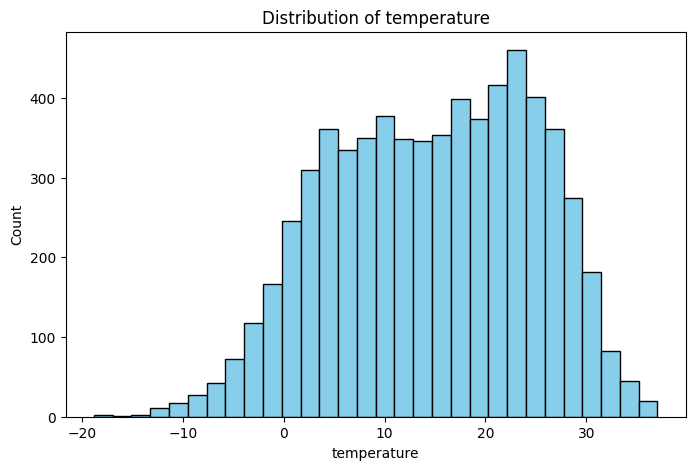

In [8]:
plot_numeric_histogram(dataset, "temperature", bins=30, color='skyblue')

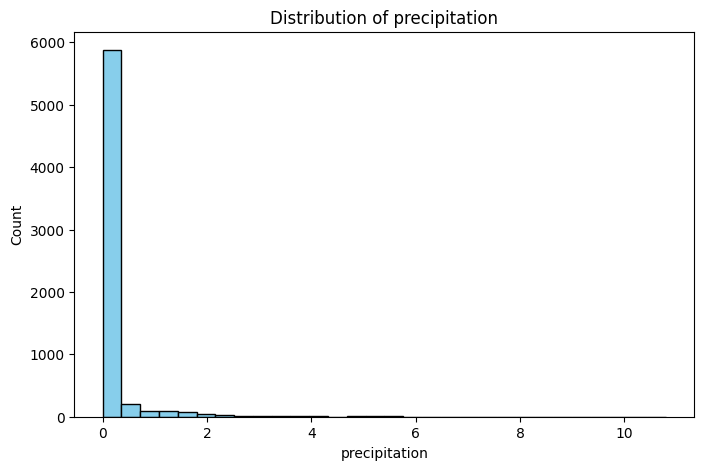

In [9]:
plot_numeric_histogram(dataset, "precipitation", bins=30, color='skyblue')

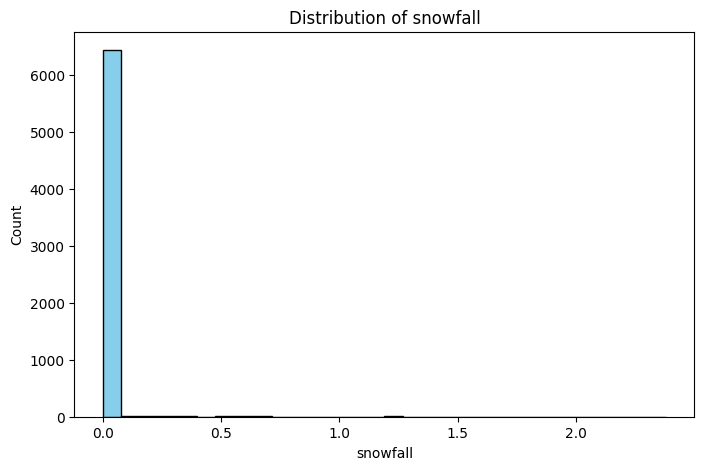

In [10]:
plot_numeric_histogram(dataset, "snowfall", bins=30, color='skyblue')

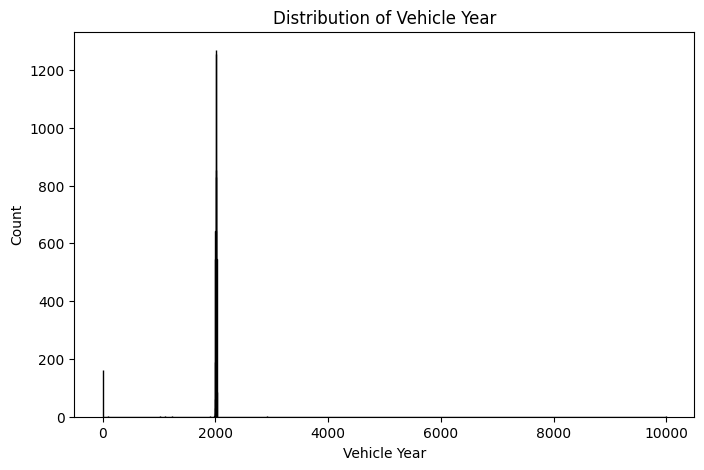

In [11]:
plot_numeric_histogram(dataset, "Vehicle Year", bins=3000, color='skyblue')

# ENLEVER LES VALEURS ABHERRENRES POUR LE VEHICULE YEAR DANS LE DATASET

In [12]:
print(dataset["Vehicle Year"].value_counts())

Vehicle Year
2016    428
2014    416
2015    412
2013    373
2017    368
2012    328
2011    309
2008    282
2007    279
2009    269
2018    266
2010    259
2005    240
2019    219
2006    213
2020    191
2004    189
2003    179
0       160
2021    150
2002    145
2022    123
2000    118
2001    105
2023     82
1999     81
2024     69
1998     59
1997     50
1996     32
1995     17
2025     15
1994     14
1993     13
1991      7
1990      7
1989      6
1987      5
9999      4
1992      4
1988      3
1985      2
2026      1
1111      1
1900      1
99        1
2914      1
1014      1
1234      1
Name: count, dtype: int64


In [13]:
# Suppression des lignes hors de la plage 1950-2025
dataset = dataset[(dataset['Vehicle Year'] >= 1950) & (dataset['Vehicle Year'] <= 2025)]


In [14]:
print(dataset["Vehicle Year"].value_counts())

Vehicle Year
2016    428
2014    416
2015    412
2013    373
2017    368
2012    328
2011    309
2008    282
2007    279
2009    269
2018    266
2010    259
2005    240
2019    219
2006    213
2020    191
2004    189
2003    179
2021    150
2002    145
2022    123
2000    118
2001    105
2023     82
1999     81
2024     69
1998     59
1997     50
1996     32
1995     17
2025     15
1994     14
1993     13
1991      7
1990      7
1989      6
1987      5
1992      4
1988      3
1985      2
Name: count, dtype: int64


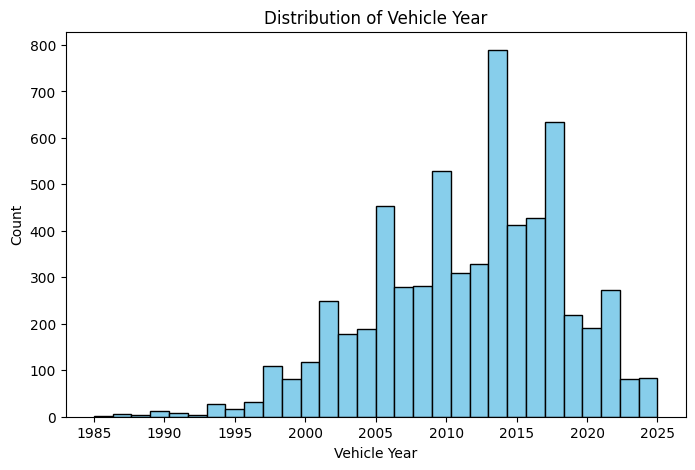

In [15]:
plot_numeric_histogram(dataset, "Vehicle Year", bins=30, color='skyblue')

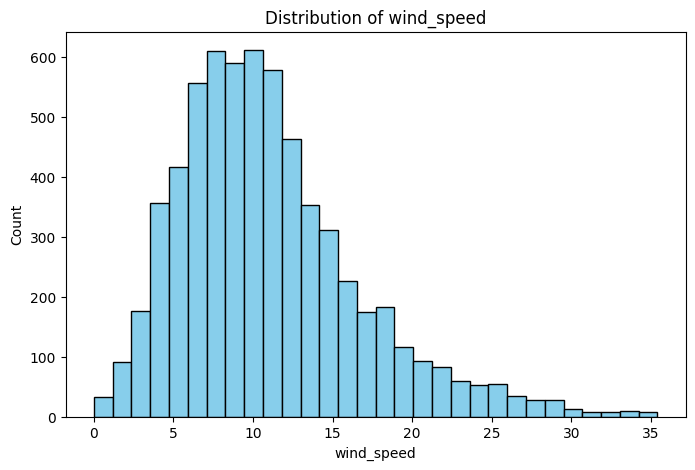

In [16]:
plot_numeric_histogram(dataset, "wind_speed", bins=30, color='skyblue')

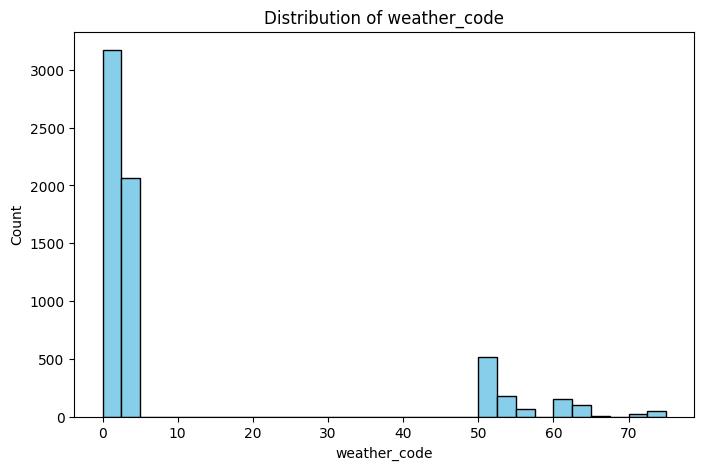

In [17]:
plot_numeric_histogram(dataset, "weather_code", bins=30, color='skyblue')

While we see that there is a great range of temperatures, and wind speeds, the county we chose is not very rainy nor snowy 

## Ploting a nuage de points

In [18]:
import matplotlib.pyplot as plt

def plot_scatter(df, x_col, y_col, color='blue', size=30, alpha=0.7):
    """
    Plot a scatter plot between two variables.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset
    x_col : str
        Name of the column for x-axis
    y_col : str
        Name of the column for y-axis
    color : str
        Color of the points (default 'blue')
    size : int
        Size of the points (default 30)
    alpha : float
        Transparency of the points (default 0.7)
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], c=color, s=size, alpha=alpha, edgecolor='k')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot of {y_col} vs {x_col}')
    plt.grid(True)
    plt.show()


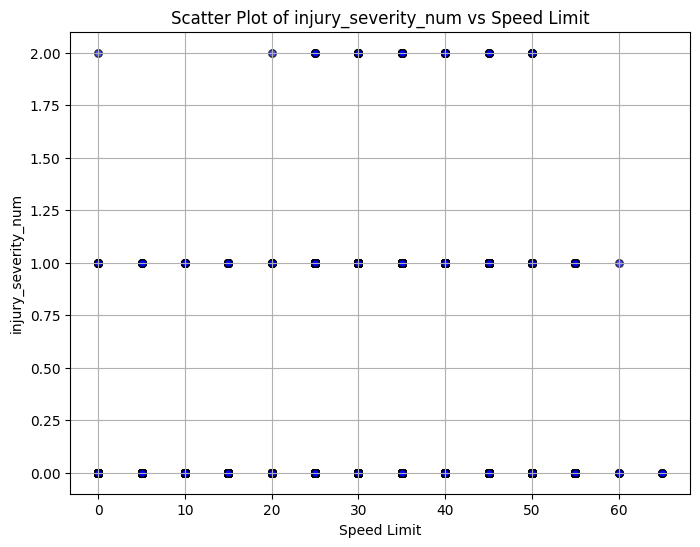

In [30]:
plot_scatter(dataset, 'Speed Limit', 'injury_severity_num')


### Meilleures barres

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

def grouped_barplot(df, numeric_col, category_col, bins=None, bin_labels=None, color_palette=None):
    """
    Plot a grouped bar chart: for each numeric bin, show counts of each category.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataset
    numeric_col : str
        Numeric variable to bin (e.g., 'Speed Limit')
    category_col : str
        Categorical variable (e.g., 'injury_severity_ord')
    bins : list or int, optional
        Bins for numeric variable (default: automatic using pandas.cut)
    bin_labels : list, optional
        Labels for bins (default: generated automatically)
    color_palette : list, optional
        Colors for each category (default matplotlib default)
    """
    # Bin numeric variable if bins are provided
    if bins is not None:
        df['numeric_bin'] = pd.cut(df[numeric_col], bins=bins, labels=bin_labels, include_lowest=True)
    else:
        df['numeric_bin'] = df[numeric_col]

    # Pivot table: counts of category per numeric bin
    pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)

    # Plot
    pivot.plot(kind='bar', figsize=(12,6), width=0.8, color=color_palette, edgecolor='black')
    plt.xlabel(numeric_col)
    plt.ylabel('Count')
    plt.title(f'Counts of {category_col} for each {numeric_col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title=category_col)
    plt.show()


C:\Users\33783\AppData\Local\Temp\ipykernel_20108\4238947062.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)


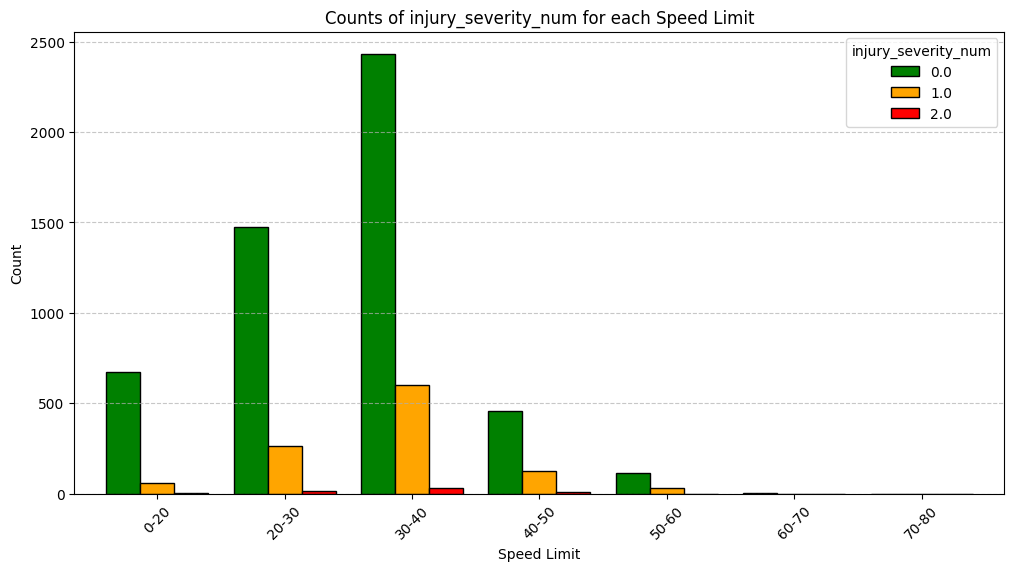

In [37]:
# Optionally, define bins for speed
speed_bins = [0, 20, 30, 40, 50, 60, 70, 80]
speed_labels = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80']

grouped_barplot(
    dataset,
    numeric_col='Speed Limit',
    category_col='injury_severity_num',
    bins=speed_bins,
    bin_labels=speed_labels,
    color_palette=['green','orange','red']
)


In [40]:
import matplotlib.pyplot as plt
import pandas as pd

def grouped_barplot_proportion(df, numeric_col, category_col, bins=None, bin_labels=None, color_palette=None):
    """
    Plot a grouped bar chart showing proportions of a categorical variable for each numeric bin.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataset
    numeric_col : str
        Numeric variable to bin (e.g., 'Speed Limit')
    category_col : str
        Categorical variable (e.g., 'injury_severity_ord')
    bins : list or int, optional
        Bins for numeric variable (default: no binning)
    bin_labels : list, optional
        Labels for bins (default: generated automatically)
    color_palette : list, optional
        Colors for each category (default matplotlib)
    """
    # Bin numeric variable if bins are provided
    if bins is not None:
        df['numeric_bin'] = pd.cut(df[numeric_col], bins=bins, labels=bin_labels, include_lowest=True)
    else:
        df['numeric_bin'] = df[numeric_col]

    # Pivot table: counts
    pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)

    # Convert counts to proportions per row
    pivot_prop = pivot.div(pivot.sum(axis=1), axis=0)

    # Plot
    pivot_prop.plot(kind='bar', figsize=(12,6), width=0.8, color=color_palette, edgecolor='black')
    plt.xlabel(numeric_col)
    plt.ylabel('Proportion')
    plt.title(f'Proportion of {category_col} for each {numeric_col}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title=category_col)
    plt.show()


C:\Users\33783\AppData\Local\Temp\ipykernel_20108\3846306390.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='numeric_bin', columns=category_col, aggfunc='size', fill_value=0)


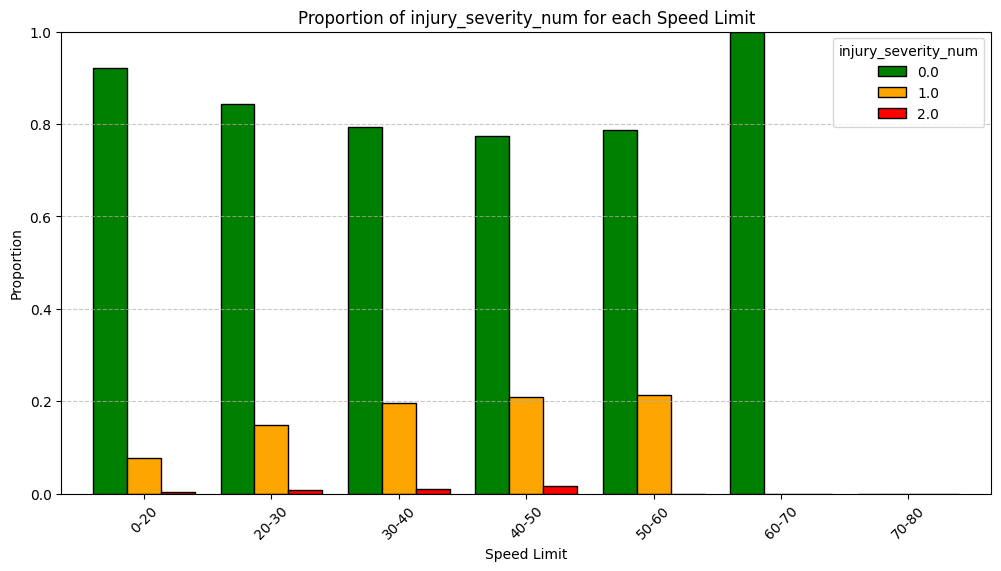

In [41]:
speed_bins = [0, 20, 30, 40, 50, 60, 70, 80]
speed_labels = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80']

grouped_barplot_proportion(
    dataset,
    numeric_col='Speed Limit',
    category_col='injury_severity_num',
    bins=speed_bins,
    bin_labels=speed_labels,
    color_palette=['green','orange','red']
)


### Variables chosen : 

For this county, let's do our regressions on the following variables : 

- Wind_Speed 
- Temperature
- Vehicle Year 

### Transformation of the variables

In [19]:
import numpy as np

# Mapping dictionary
injury_map = {
    'NO APPARENT INJURY': 0,
    'No Apparent Injury': 0,
    'POSSIBLE INJURY': 1,
    'Possible Injury': 1,
    'SUSPECTED MINOR INJURY': 1,
    'Suspected Minor Injury': 1,
    'SUSPECTED SERIOUS INJURY': 2,
    'Suspected Serious Injury': 2,
    'FATAL INJURY': 2,
    'Fatal Injury': 2,
    np.nan: np.nan
}

# Create numeric column
dataset['injury_severity_num'] = dataset['Injury Severity'].map(injury_map)

# Check results
print(dataset[['Injury Severity', 'injury_severity_num']].head(10))


          Injury Severity  injury_severity_num
0      NO APPARENT INJURY                  0.0
1         POSSIBLE INJURY                  1.0
2      NO APPARENT INJURY                  0.0
3         POSSIBLE INJURY                  1.0
4      NO APPARENT INJURY                  0.0
5  SUSPECTED MINOR INJURY                  1.0
6      No Apparent Injury                  0.0
7  Suspected Minor Injury                  1.0
8      No Apparent Injury                  0.0
9      NO APPARENT INJURY                  0.0


In [20]:
print(dataset['injury_severity_num'].value_counts().sort_index())


injury_severity_num
0.0    5154
1.0    1072
2.0      58
Name: count, dtype: int64


Regarder les termes d'interaction. 
On met 100 regressions et on élimine les termes inutiles. Quels facteurs interragissent entre eux

Réfléchir à comment gérer les termes d'interaction. 

=> Avoir une prochaine regression (un peu simple) pour la prochaine fois.

=> Faire la visualisation (dans le rapport) avec les termes croisés importants

=> Interactions d'ordre superieur 

# Regression 

At first we have to make sure to have the right packages 

In [21]:
#pip install scikit-learn
#pip install statsmodels


In [22]:
def clean_column(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    df[column_name] = df[column_name].replace([np.inf, -np.inf], np.nan)
    return df.dropna(subset=[column_name])


In [23]:
print(dataset["injury_severity_num"].value_counts(),dataset["temperature"].value_counts())

injury_severity_num
0.0    5154
1.0    1072
2.0      58
Name: count, dtype: int64 temperature
3.876500     3
7.911500     3
10.879001    3
27.137499    3
10.268000    3
            ..
2.283000     1
6.035500     1
21.622499    1
23.695999    1
24.928499    1
Name: count, Length: 6070, dtype: int64


### Centrons et réduisons toutes les variables d'intêret : 

In [24]:
import pandas as pd

def center_and_scale(df, columns):
    """
    Centre et réduit les colonnes numériques d'un DataFrame.
    
    Paramètres
    ----------
    df : pandas.DataFrame
        Dataset d'origine
    columns : list of str
        Noms des colonnes à standardiser
    
    Retour
    ------
    df_scaled : pandas.DataFrame
        Copie du DataFrame avec les colonnes standardisées
    stats : dict
        Moyenne et écart-type utilisés (utile pour interprétation ou inverse transform)
    """
    df_scaled = df.copy()
    stats = {}

    for col in columns:
        mean = df_scaled[col].mean()
        std = df_scaled[col].std()

        # Sécurité : éviter division par zéro
        if std == 0 or pd.isna(std):
            raise ValueError(f"La colonne {col} a un écart-type nul ou invalide.")

        df_scaled[col] = (df_scaled[col] - mean) / std
        stats[col] = {"mean": mean, "std": std}

    return df_scaled, stats


In [25]:
cols_to_scale = [
    'temperature',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code',
    'Speed Limit'
]

df_scaled, scaling_stats = center_and_scale(dataset, cols_to_scale)

print(df_scaled["injury_severity_num"].value_counts(),df_scaled["temperature"].value_counts())

injury_severity_num
0.0    5154
1.0    1072
2.0      58
Name: count, dtype: int64 temperature
-1.083666    3
-0.680333    3
-0.383706    3
 1.241472    3
-0.444780    3
            ..
-1.242950    1
-0.867855    1
 0.690200    1
 0.897465    1
 1.020664    1
Name: count, Length: 6070, dtype: int64


In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def linear_regression_multi(df, explanatory_vars, dependent_var, plot=True):
    """
    Perform a multiple linear regression (OLS) on several columns of a DataFrame
    and optionally plot the regression line for the first explanatory variable.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    explanatory_vars (list of str): List of independent variable column names
    dependent_var (str): Name of the dependent variable column
    plot (bool): Whether to plot the regression line for the first explanatory variable

    Returns:
    model: statsmodels OLS fitted model
    """
    # Clean the dataset for all columns
    for col in explanatory_vars + [dependent_var]:
        df = clean_column(df, col)

    # Select X and y
    X = df[explanatory_vars]
    y = df[dependent_var]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit OLS regression
    model = sm.OLS(y, X).fit()

    # Print summary
    print(model.summary())

    # Optional plot for the first explanatory variable
    if plot and len(explanatory_vars) == 1:
        plt.figure(figsize=(8, 5))
        plt.scatter(df[explanatory_vars[0]], y, color='blue', alpha=0.6, label='Data points')
        plt.plot(df[explanatory_vars[0]], model.predict(X), color='red', linewidth=2, label='Regression line')
        plt.xlabel(explanatory_vars[0])
        plt.ylabel(dependent_var)
        plt.title(f'Linear Regression: {dependent_var} ~ {explanatory_vars[0]}')
        plt.legend()
        plt.show()
    
    return model

# Example usage:
explanatory_vars = ["temperature", "Vehicle Year", "wind_speed","day_or_night_code","Speed Limit"]
dependent_variable = "injury_severity_num"

model = linear_regression_multi(df_scaled, explanatory_vars, dependent_variable, plot=False)


                             OLS Regression Results                            
Dep. Variable:     injury_severity_num   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     19.23
Date:                 Tue, 16 Dec 2025   Prob (F-statistic):           4.77e-19
Time:                         13:48:31   Log-Likelihood:                -3333.9
No. Observations:                 6284   AIC:                             6680.
Df Residuals:                     6278   BIC:                             6720.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1887

### Nouveau type de regression 

In [27]:
from sklearn.preprocessing import StandardScaler
from statsmodels.miscmodels.ordinal_model import OrderedModel

def run_ordered_logit(
    df,
    y_col,
    x_cols,
    distr='logit',
    standardize=True,
    dropna=True,
    method='bfgs',
    disp=False
):
    """
    Run an ordinal regression model (Ordered Logit or Ordered Probit).

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset
    y_col : str
        Name of the dependent (ordinal) variable
    x_cols : list of str
        List of explanatory variables
    distr : str
        Distribution to use: 'logit' (default) or 'probit'
    standardize : bool
        Whether to standardize explanatory variables (recommended)
    dropna : bool
        Whether to drop rows with missing values
    method : str
        Optimization method used by statsmodels
    disp : bool
        Whether to display optimization output

    Returns
    -------
    result : statsmodels object
        Fitted ordinal regression results
    """

    # Select relevant columns
    cols = x_cols + [y_col]
    data = df[cols].copy()

    # Drop rows with missing values
    if dropna:
        data = data.dropna()

    # Separate explanatory variables and target variable
    X = data[x_cols]
    y = data[y_col]

    # Standardize explanatory variables
    if standardize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Define the ordinal regression model
    model = OrderedModel(
        y,
        X,
        distr=distr
    )

    # Fit the model
    result = model.fit(method=method, disp=disp)

    return result


In [28]:
x_vars = [
    'temperature',
    'wind_speed',
    'Vehicle Year',
    'day_or_night_code', 'Speed Limit'
]

result = run_ordered_logit(
    df=dataset,
    y_col='injury_severity_num',
    x_cols=x_vars
)

print(result.summary())


                              OrderedModel Results                             
Dep. Variable:     injury_severity_num   Log-Likelihood:                -3137.2
Model:                    OrderedModel   AIC:                             6288.
Method:             Maximum Likelihood   BIC:                             6336.
Date:                 Tue, 16 Dec 2025                                         
Time:                         13:48:32                                         
No. Observations:                 6284                                         
Df Residuals:                     6277                                         
Df Model:                            5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0841      0.036      2.356      0.018       0.014       0.154
x2            -0.0087      0.034     -0.252

### Matrice de corrélation des variables étudiées

In [29]:
# Pearson correlation for numeric variables
numeric_cols = ['temperature', 'wind_speed', 'Vehicle Year', 'Speed Limit']
corr_matrix = dataset[numeric_cols].corr()
print(corr_matrix)


              temperature  wind_speed  Vehicle Year  Speed Limit
temperature      1.000000   -0.209231      0.031090    -0.031593
wind_speed      -0.209231    1.000000      0.004128    -0.026538
Vehicle Year     0.031090    0.004128      1.000000    -0.054217
Speed Limit     -0.031593   -0.026538     -0.054217     1.000000
